<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Ecuacion_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ecuacion de la onda.

$\frac{∂ ^2 u}{\partial t^2} -4 \frac{\partial ^2 u}{\partial x^2}$ $= 0$

Con las condiciones

*   $u(0,t) = u(1,t) = 0$  $t \leq$
*   Elemento de la lista



In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm #color mapa

from tabulate import tabulate

In [2]:
def f(x):
  return np.sin(np.pi*x)

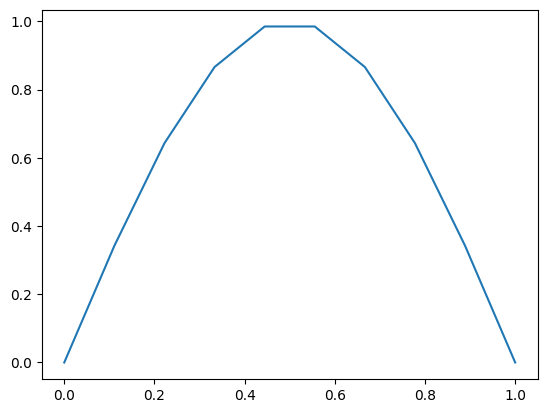

In [3]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

escribimos la matriz

In [4]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

$r = \lambda = \frac{\alpha ^2 k^2}{h^2}$

In [6]:
r = 1

In [7]:
A = tridiagonal(9, 2 -2*r, r)

In [8]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [9]:
u0 = sp.Matrix([f(0.1*(i+1)) for i in range (9)])

debido a que la derivada es 0, se convierte en el mismo valor de nodo de abajo

In [12]:
u1 = u0

In [26]:
def onda(A, u0, u1, j):
  #Asegurar que u0 y u1 sean vectores columna
  u0 = sp.Matrix(u0)
  u1 = sp.Matrix(u1)

  S = [u0, u1]

  for n in range(2, j):
    sol = A * S[n-1] - S[n-2]
    S.append(sol)

  return sp.Matrix([s.T for s in S])

In [28]:
j = 50

In [29]:
U = onda(A, u0, u1, j)

**Ejercicio 1**: Generar las gráficas 2D y 3D de la solución hasta t=0.5

In [30]:
U_np = np.array(U.tolist(), dtype = float)

In [40]:
x = np.linspace(0,0.5,9)
y = np.linspace(0,0.5,j)
X, Y = np.meshgrid(x, y)

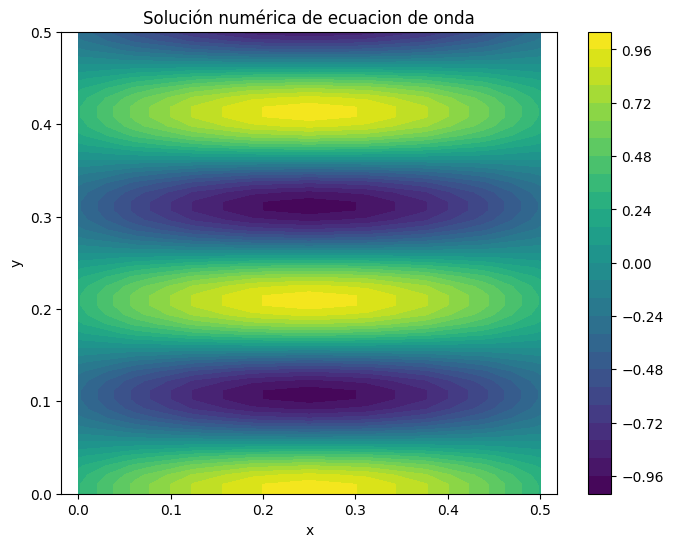

In [41]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de ecuacion de onda')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

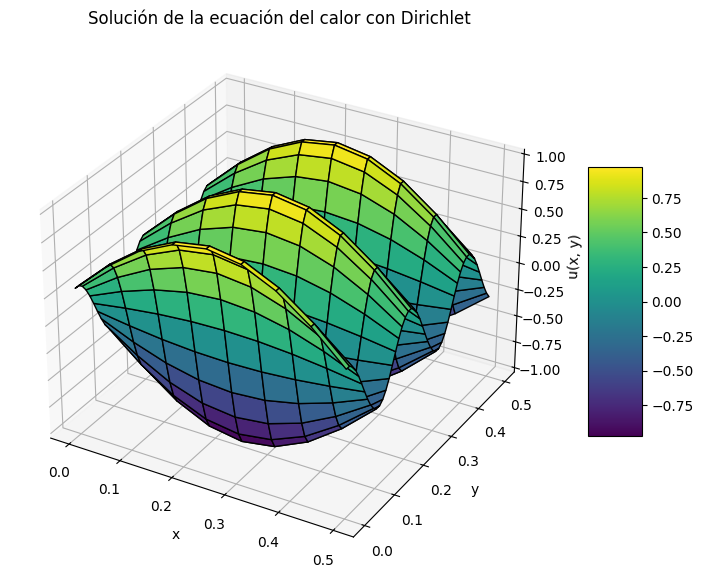

In [42]:
%matplotlib inline

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Ejercicio 4**: Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.
onda.png

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


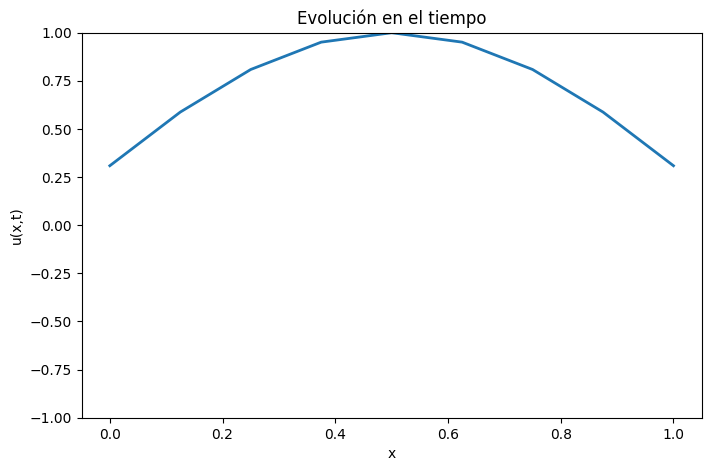

In [38]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots(figsize=(8,5))

line, = ax.plot(x, U_np[0], lw=2)

ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=U_np.shape[0], interval=200)
plt.show()

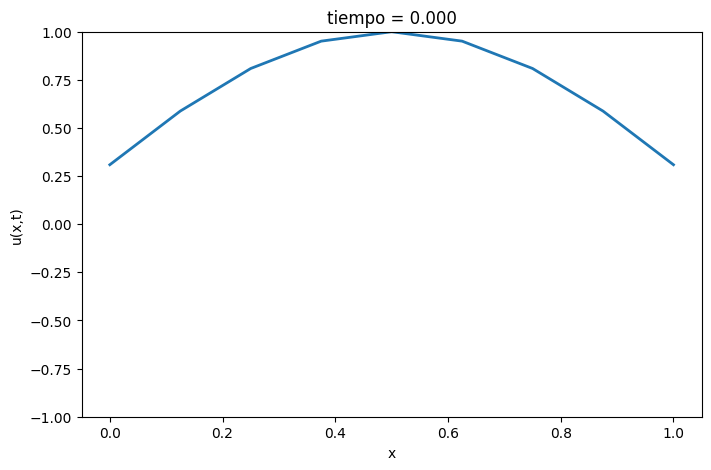

In [39]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots(figsize=(8,5))

line, = ax.plot(x, U_np[0], lw=2)

ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=U_np.shape[0], interval=200)

#Necesario en Colab para mostrar animaciones:
from IPython.display import HTML
HTML(anim.to_jshtml())
